## Poin Assignment :
**1.** Lakukan investigasi pada kondisi berikut :
- 1a. Lakukan pengecekan pada kolom mana yang terdapat data continue di dataframe ? (20 poin)
- 1b. Lakukan pengecekan pada kolom mana yang terdapat jenis kategorikal serta Uraikan juga jenis kategorikalnya termasuk kategorikal apa di masing-masing kolom dataframe ? (20 poin)

`clue` lakukan dengan histogram untuk data kontinu, dan data kategorikal menggunakan barplot

**2.** Lakukan eksplorasi dan mencoba looping pada kolom dan baris dataframe `titanic.csv`
- for loop (15 poin)
- while loop (15 poin)

**3** Lakukan manipulasi yang menghasilkan insight apapun untuk memproses dataframe menggunakan `lambda function` pada :
1. kolom numerikal (1 kolom) dan (10)
2. kolom kategorikal (1 kolom) (10)
3. Tulis insightnya (10)

### Note : soal 1,2,3 menggunakan file titanic.csv

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('titanic.xlsx') # file excel
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 1a. Lakukan pengecekan pada kolom mana yang terdapat data continue di dataframe ?





In [86]:
df.dtypes

,0
pclass,int64
survived,int64
name,object
sex,object
age,float64
sibsp,int64
parch,int64
ticket,object
fare,float64
cabin,object


In [92]:
continuous_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Kolom Data Kontinu:")
for col in continuous_cols:
    print(f"- {col}")

Kolom Data Kontinu:
- pclass
- survived
- age
- sibsp
- parch
- fare
- body


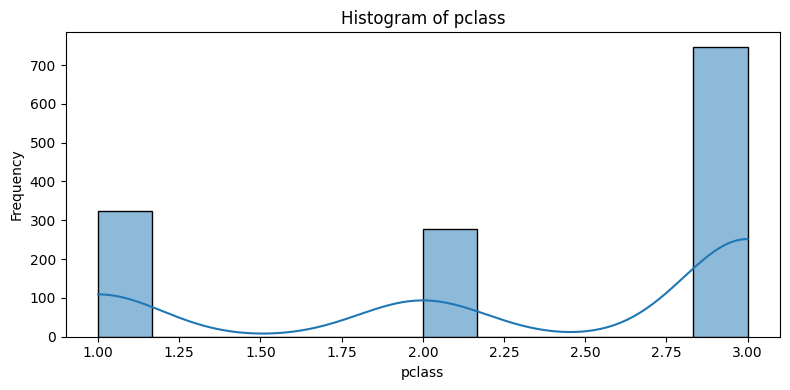

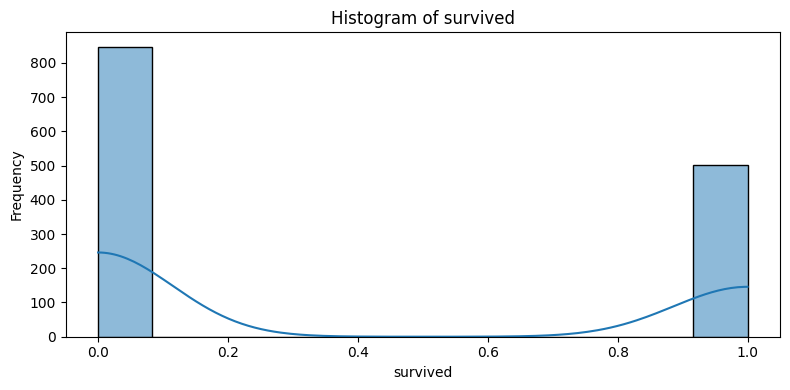

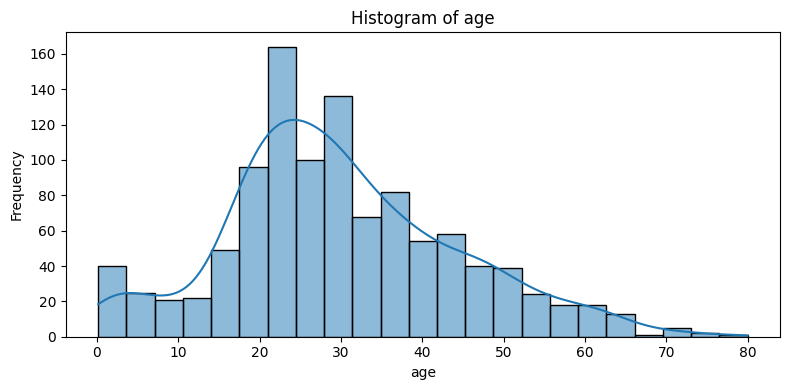

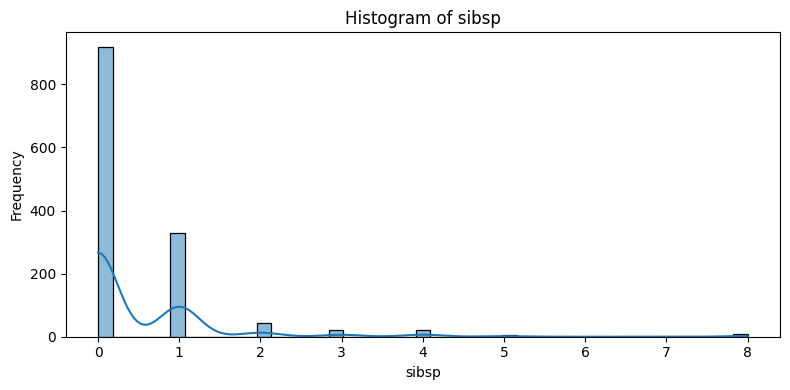

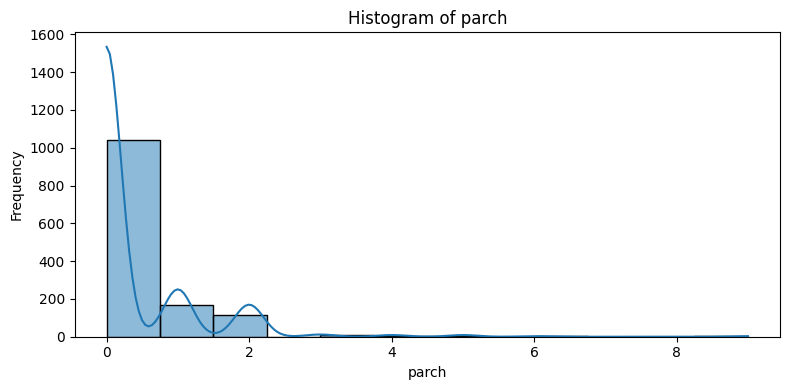

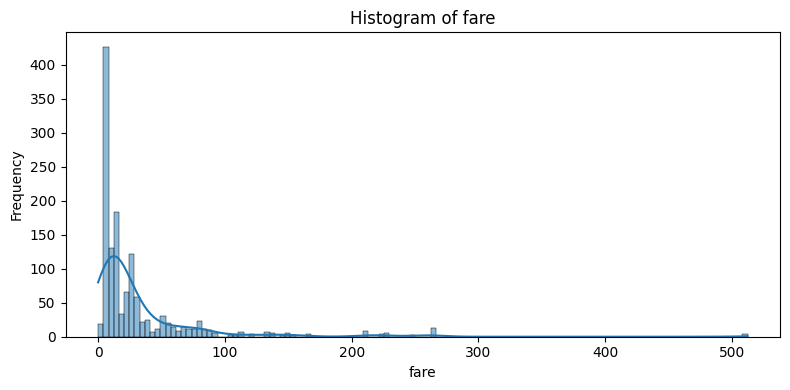

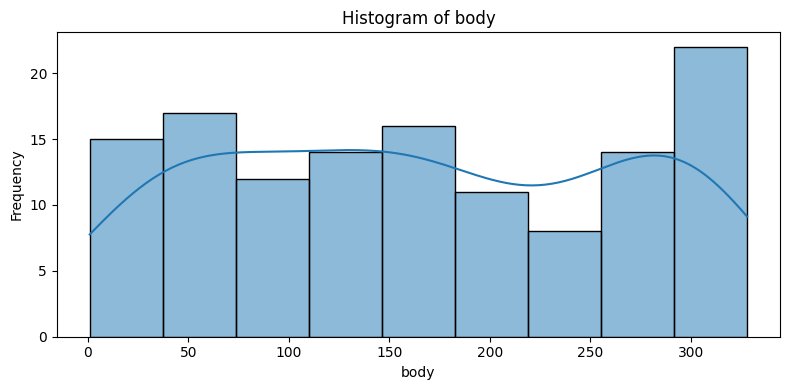

In [93]:
def plot_continuous(columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

plot_continuous(continuous_cols)

## 1b. Lakukan pengecekan pada kolom mana yang terdapat jenis kategorikal serta Uraikan juga jenis kategorikalnya termasuk kategorikal apa di masing-masing kolom dataframe ?

In [95]:
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("\nKolom Data Kategorikal dan Jenisnya:")
for col in categorical_cols:
    unique_vals = df[col].nunique()
    if unique_vals > 20:
        cat_type = 'High cardinality / Unique identifier'
    elif col in ['class', 'embarked', 'pclass', 'deck']:
        cat_type = 'Ordinal'
    else:
        cat_type = 'Nominal'

    print(f"- {col} ({cat_type}, {unique_vals} unique values)")


Kolom Data Kategorikal dan Jenisnya:
- name (High cardinality / Unique identifier, 1303 unique values)
- sex (Nominal, 2 unique values)
- ticket (High cardinality / Unique identifier, 937 unique values)
- cabin (High cardinality / Unique identifier, 186 unique values)
- embarked (Ordinal, 3 unique values)
- boat (High cardinality / Unique identifier, 28 unique values)
- home.dest (High cardinality / Unique identifier, 369 unique values)


<ipython-input-96-454ae7591a89>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


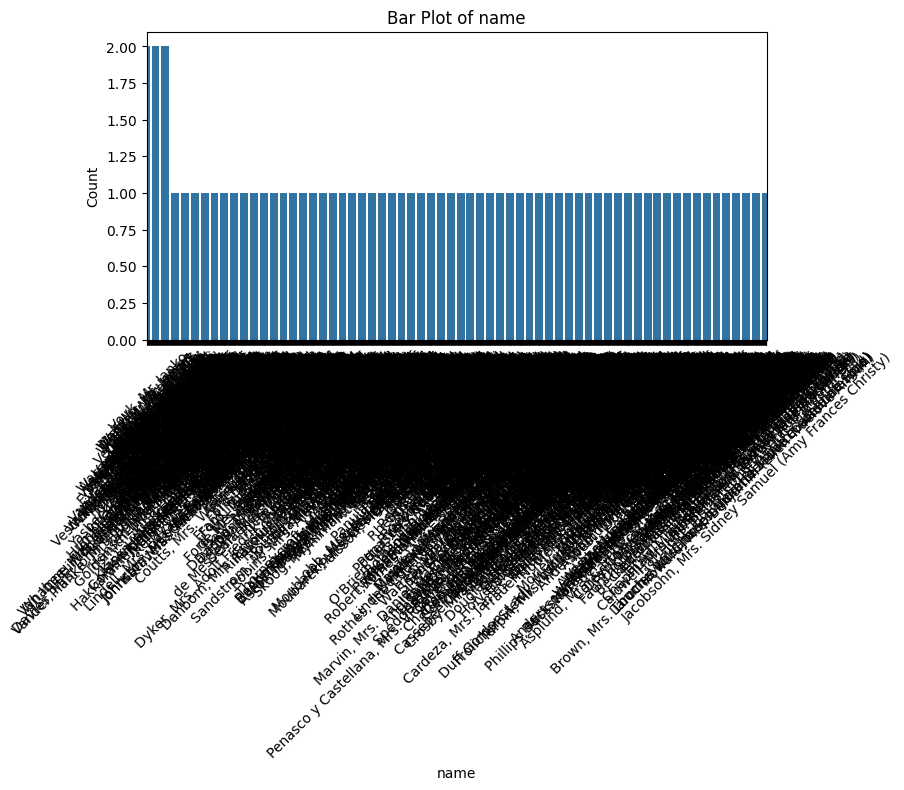

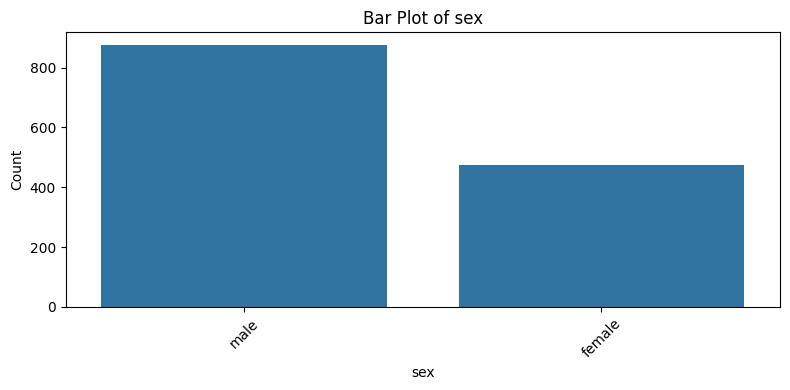

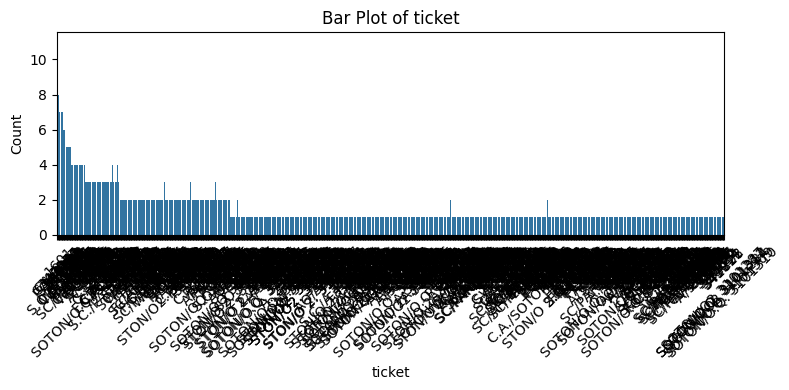

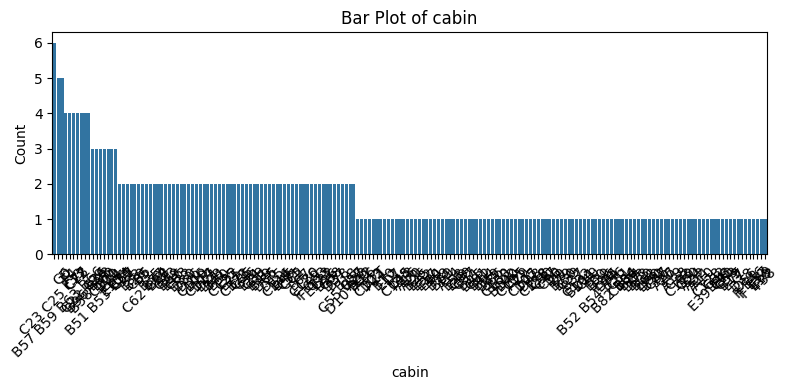

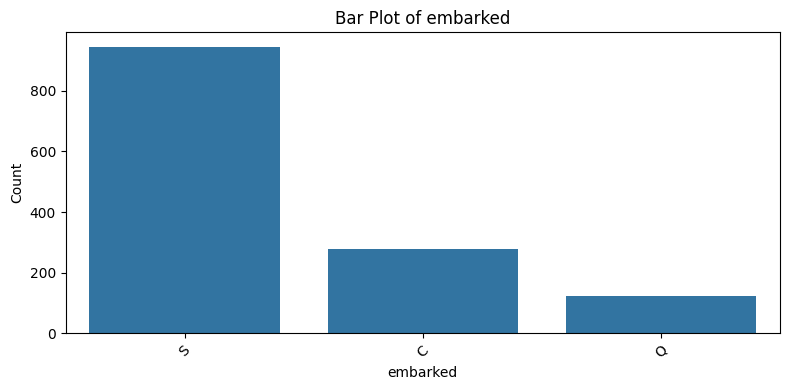

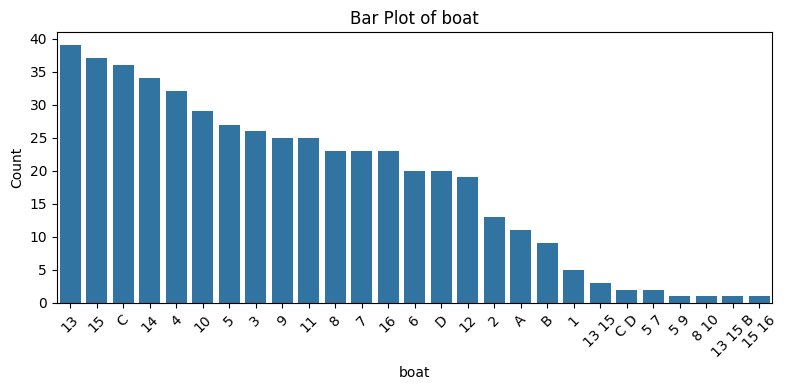

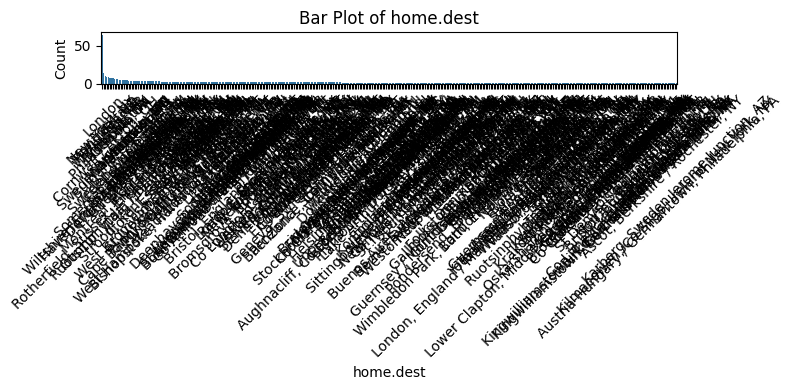

In [96]:
def plot_categorical(columns):
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_categorical(categorical_cols)

## 2A for loop

In [97]:
print("\nContoh looping menggunakan for:")
for col in df.columns[:5]:
    print(f"Kolom {col} memiliki {df[col].nunique()} nilai unik")


Contoh looping menggunakan for:
Kolom pclass memiliki 3 nilai unik
Kolom survived memiliki 2 nilai unik
Kolom name memiliki 1303 nilai unik
Kolom sex memiliki 2 nilai unik
Kolom age memiliki 98 nilai unik


## 2B while loop

In [101]:
print("\nContoh looping menggunakan while:")
i = 0
while i < 5:
    col = df.columns[i]
    print(f"{i+1}. Kolom: {col}, Tipe: {df[col].dtype}")
    i += 1


Contoh looping menggunakan while:
1. Kolom: pclass, Tipe: int64
2. Kolom: survived, Tipe: int64
3. Kolom: name, Tipe: object
4. Kolom: sex, Tipe: object
5. Kolom: age, Tipe: float64


## 3A kolom numerikal

In [99]:
df['age_group'] = df['age'].apply(lambda x: 'young' if x < 18 else 'adult' if x < 60 else 'elder' if pd.notnull(x) else 'unknown')
print(df[['age', 'age_group']].head())

       age age_group
0  29.0000     adult
1   0.9167     young
2   2.0000     young
3  30.0000     adult
4  25.0000     adult


## 3B kolom kategorikal

In [100]:
df['sex_code'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
print(df[['sex', 'sex_code']].head())

      sex  sex_code
0  female         0
1    male         1
2  female         0
3    male         1
4  female         0


## 3C Insight

- Dengan mengelompokkan age ke dalam kategori (young, adult, elder), kita
bisa menganalisis siapa yang lebih mungkin bertahan hidup.

- Mengubah sex ke dalam format numerik (sex_code) mempermudah analisis statistik dan modeling.

- Looping memungkinkan kita untuk mengevaluasi struktur data secara fleksibel, terutama saat eksplorasi awal.

- Visualisasi histogram dan barplot membantu memahami distribusi dan frekuensi data secara visual.